# pyFiDEL 

This is simple tutorial to demonstrate the usage of pyFiDEL package

In [1]:
from pyFiDEL import SimClassifier, PCR
from pyFiDEL.ranks import build_metric
from pyFiDEL.ranks import get_fermi_min, get_fermi_root, build_correspond_table, get_lambda

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# create simulator

c = SimClassifier(N = 10000, rho = 0.5)

In [3]:
# generate Gaussian score with target AUC

score = c.create_gaussian_scores(auc0 = .9)

Final AUC: 0.90005808 (iter: 6) mu2: 1.8123876048736465


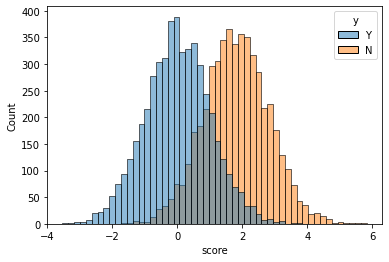

In [4]:
# show score histogram

c.plot_score()

plt.savefig('score_dist.pdf', dpi=300)

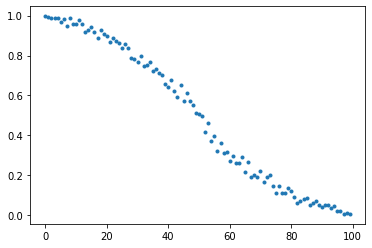

In [6]:
p = PCR(c.score, c.y, sample_size=100, sample_n=300)
plt.plot(p.pcr, '.')

In [5]:
df, info = build_metric(c.score, c.y)
df

,score,y,rank,tpr,fpr,bac,prec
0,-4.216492,Y,1,0.0002,0.0000,0.5001,1.00000
1,-3.521585,Y,2,0.0004,0.0000,0.5002,1.00000
2,-3.478176,Y,3,0.0006,0.0000,0.5003,1.00000
3,-3.460937,Y,4,0.0008,0.0000,0.5004,1.00000
4,-3.411251,Y,5,0.0010,0.0000,0.5005,1.00000
...,...,...,...,...,...,...,...
9995,4.826799,N,9996,1.0000,0.9992,0.5004,0.50020
9996,4.902482,N,9997,1.0000,0.9994,0.5003,0.50015
9997,4.969449,N,9998,1.0000,0.9996,0.5002,0.50010
9998,5.022174,N,9999,1.0000,0.9998,0.5001,0.50005


In [6]:
info

{'auc_rank': 0.7000190476190477,
 'auc_bac': 0.7000190476190475,
 'auprc': 0.8318624253282337,
 'rho': 0.7,
 'beta': 2.6067801232896244,
 'mu': 0.867135668353576,
 'r_star': 0.5420994856632015}

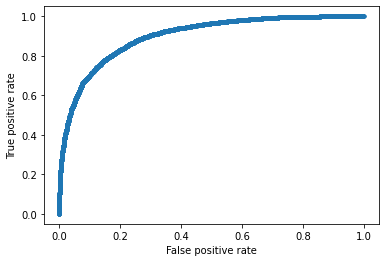

In [11]:
#sns.scatterplot(data=df, x='fpr', y='tpr', sizes=5)
plt.plot(df['fpr'], df['tpr'], '.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.savefig('roc_curve.pdf', dpi=300)

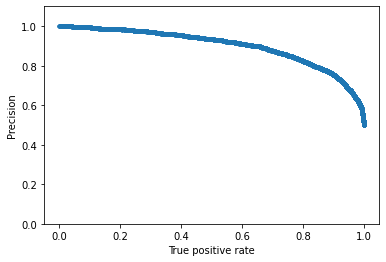

In [14]:
#g = sns.scatterplot(data=df, x='tpr', y='prec')
#g.set_ylim(0, 1)

plt.plot(df['tpr'], df['prec'], '.')
plt.xlabel('True positive rate')
plt.ylabel('Precision')
plt.ylim(0, 1.1)

plt.savefig('prec_curve.pdf', dpi=300)

(0.4, 1.0)

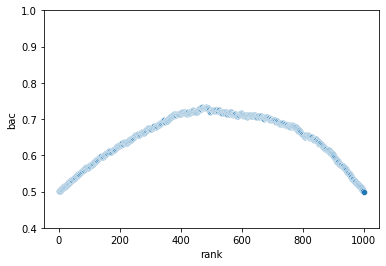

In [15]:
g = sns.scatterplot(data=df, x='rank', y='bac')
g.set_ylim(.4, 1)

In [5]:
auclist = [0.6, 0.7, 0.8, 0.9]
ans = pd.DataFrame()

for auc in auclist:
    ans = ans.append(get_fermi_min(auc, 0.5, resol=0.00001), ignore_index=True)
    
ans

,beta,mu,r_star
0,1.220736,0.499996,0.499996
1,2.595059,0.499997,0.499997
2,4.394915,0.499997,0.499997
3,7.560261,0.500003,0.500003


In [6]:
auclist = [0.6, 0.7, 0.8, 0.9]
ans = pd.DataFrame()

for auc in auclist:
    ans = ans.append(get_lambda(auc, 0.5), ignore_index=True)
   
ans['beta'] = ans['l2'] * 1000
ans['mu'] = - ans['l1'] / (1000 * ans['l2'])
ans

,l1low,l2low,l1high,l2high,l1,l2,r_star,beta,mu
0,-0.540601,0.0012,-1.290994,0.002582,-0.690679,0.001476,467.813541,1.476399,0.467814
1,-0.961201,0.0024,-1.490712,0.002981,-1.173005,0.002633,445.574064,2.632571,0.445574
2,-1.261801,0.0036,-1.825742,0.003651,-1.600166,0.003631,440.708720,3.630892,0.440709
3,-1.442401,0.0048,-2.581989,0.005164,-2.354071,0.005091,462.381988,5.091183,0.462382


In [2]:
ans = pd.DataFrame()

for auc in auclist:
    ans = ans.append(get_fermi_root(auc, 0.5), ignore_index=True)
    
ans

NameError: name 'auclist' is not defined

In [8]:
auclist = np.linspace(0.52, 0.98, num=47)
rholist = np.linspace(0.1, 0.9, num=17)

df = build_correspond_table(auclist, rholist, resol=0.00001, method='root')
df

,auc,rho,beta,mu,r_star
0,0.52,0.10,0.240210,-8.655104,0.491996
1,0.52,0.15,0.240201,-6.728451,0.492997
2,0.52,0.20,0.240194,-5.277569,0.493997
3,0.52,0.25,0.240187,-4.078982,0.494998
4,0.52,0.30,0.240182,-3.031731,0.495998
...,...,...,...,...,...
794,0.98,0.70,19.676180,0.700139,0.657077
795,0.98,0.75,20.720782,0.750272,0.697252
796,0.98,0.80,22.225303,0.800531,0.738157
797,0.98,0.85,24.449517,0.851058,0.780112


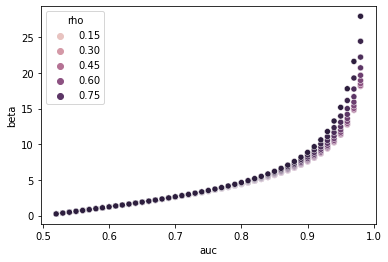

In [11]:
sns.scatterplot(data=df, x='auc', y='beta', hue='rho')
plt.savefig('auc-beta.pdf', dpi=300)

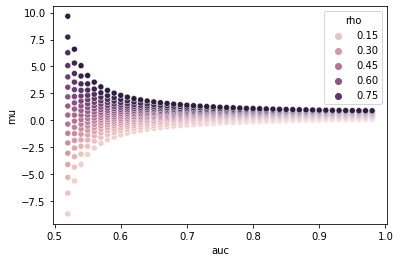

In [12]:
sns.scatterplot(data=df, x='auc', y='mu', hue='rho')
plt.savefig('auc-mu.pdf', dpi=300)

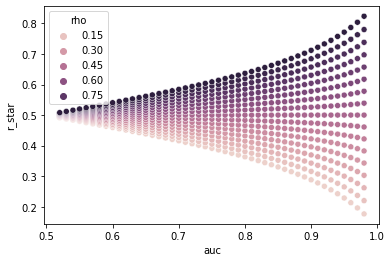

In [13]:
sns.scatterplot(data=df, x='auc', y='r_star', hue='rho')
plt.savefig('auc-r_star.pdf', dpi=300)

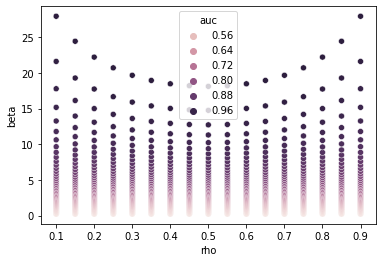

In [14]:
sns.scatterplot(data=df, x='rho', y='beta', hue='auc')
plt.savefig('rho-beta.pdf', dpi=300)

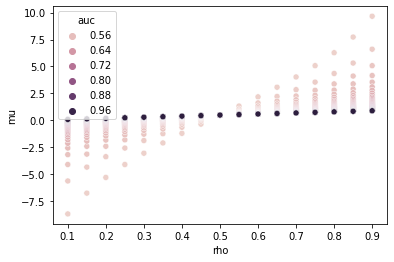

In [15]:
sns.scatterplot(data=df, x='rho', y='mu', hue='auc')
plt.savefig('rho-mu.pdf', dpi=300)

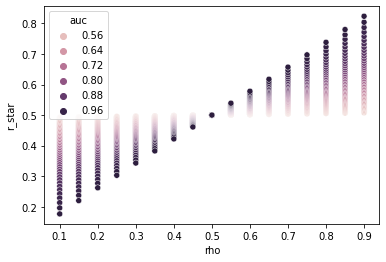

In [16]:
sns.scatterplot(data=df, x='rho', y='r_star', hue='auc')
plt.savefig('rho-r_star.pdf', dpi=300)

## Probability of class at given rank

In [2]:
# create simulator

c = SimClassifier(N = 10000, rho = 0.7)

# generate Gaussian score with target AUC

score = c.create_gaussian_scores(auc0 = .85)

Final AUC: 0.8500255238095238 (iter: 75) mu2: 1.4657381559184341


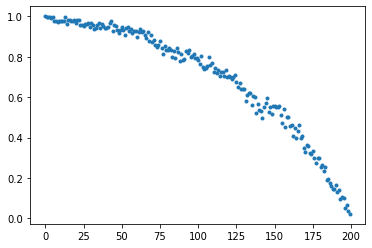

In [3]:
p = PCR(c.score, c.y, sample_size=200, sample_n=400)
plt.plot(p.pcr, '.')

In [4]:
print(f'AUC from pcr: {p.auc()}')
print(f'AUPRC from pcr: {p.auprc()}')

AUC from pcr: 0.8481363095238097
AUPRC from pcr: 0.9152291090919258


In [5]:
df0, info0 = build_metric(c.score, c.y)
print(f'AUC from scores: {info0["auc_rank"]}')
print(f'AUPRC from scores: {info0["auprc"]}')
info0

AUC from scores: 0.8500255238095238
AUPRC from scores: 0.9252058854057271


{'auc_rank': 0.8500255238095238,
 'auc_bac': 0.8500255238095238,
 'auprc': 0.9252058854057271,
 'rho': 0.7,
 'beta': 5.792732883688017,
 'mu': 0.7303791984421355,
 'r_star': 0.5841100924087566}

In [6]:
df, info = p.build_metric()
info

... build metric parameters (N = 200)


{'auc_rank': 0.8481363095238097,
 'auc_bac': 0.8481363095238093,
 'auprc': 0.9152291090919258,
 'rho': 0.7,
 'beta': 5.733014531921825,
 'mu': 0.7312385627053996,
 'r_star': 0.5834458341732478}

In [7]:
df

,rank,prob,tpr,fpr,bac,prec
0,1.0,1.0000,0.007143,0.000000,0.503571,1.000000
1,2.0,0.9950,0.014250,0.000083,0.507083,0.997500
2,3.0,0.9975,0.021375,0.000125,0.510625,0.997500
3,4.0,0.9950,0.028482,0.000208,0.514137,0.996875
4,5.0,0.9925,0.035571,0.000333,0.517619,0.996000
...,...,...,...,...,...,...
195,196.0,0.1025,0.998750,0.936250,0.531250,0.713393
196,197.0,0.0525,0.999125,0.952042,0.523542,0.710038
197,198.0,0.0650,0.999589,0.967625,0.515982,0.706780
198,199.0,0.0350,0.999839,0.983708,0.508065,0.703405


<AxesSubplot:xlabel='rank'>

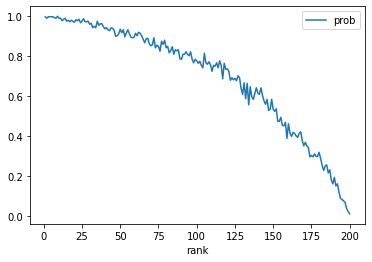

In [22]:
df.plot(x='rank', y='prob')

<AxesSubplot:xlabel='tpr'>

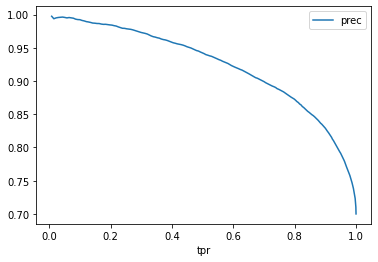

In [23]:
df.plot(x='tpr', y='prec')

<AxesSubplot:xlabel='fpr'>

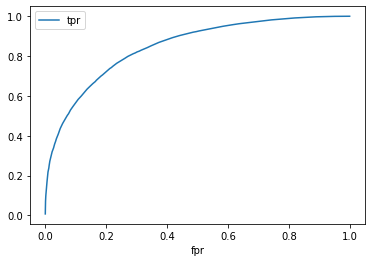

In [24]:
df.plot(x='fpr', y='tpr')

<AxesSubplot:xlabel='rank'>

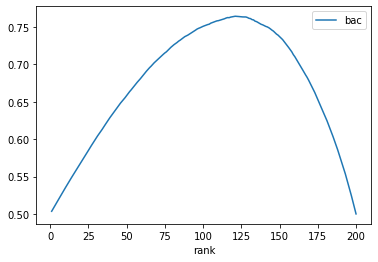

In [25]:
df.plot(x='rank', y='bac')

In [8]:
p.check_fermi()

{'MAE': 0.030095996545731304,
 'RMSE': 0.04308121274201026,
 'SSEV': 199.43990177270678}

In [9]:
p.df

,rank,prob,tpr,fpr,bac,prec,fy,err
0,1.0,1.0000,0.007143,0.000000,0.503571,1.000000,0.984686,0.015314
1,2.0,0.9950,0.014250,0.000083,0.507083,0.997500,0.984247,0.010753
2,3.0,0.9975,0.021375,0.000125,0.510625,0.997500,0.983797,0.013703
3,4.0,0.9950,0.028482,0.000208,0.514137,0.996875,0.983333,0.011667
4,5.0,0.9925,0.035571,0.000333,0.517619,0.996000,0.982857,0.009643
...,...,...,...,...,...,...,...,...
195,196.0,0.1025,0.998750,0.936250,0.531250,0.713393,0.193699,-0.091199
196,197.0,0.0525,0.999125,0.952042,0.523542,0.710038,0.189261,-0.136761
197,198.0,0.0650,0.999589,0.967625,0.515982,0.706780,0.184902,-0.119902
198,199.0,0.0350,0.999839,0.983708,0.508065,0.703405,0.180621,-0.145621


In [12]:
p.df[['prob', 'fy']].corr(method='pearson')

,prob,fy
prob,1.000000,0.986916
fy,0.986916,1.000000


In [14]:
p.df[['prob', 'fy']].corr(method='kendall')

,prob,fy
prob,1.000000,0.939902
fy,0.939902,1.000000


In [15]:
p.df[['prob', 'fy']].corr(method='spearman')

,prob,fy
prob,1.000000,0.993841
fy,0.993841,1.000000


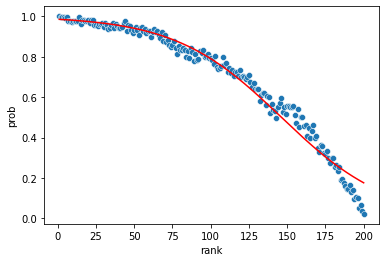

In [18]:
import seaborn as sns

sns.scatterplot(data=p.df, x='rank', y='prob')
plt.plot(p.df['rank'], p.df['fy'], 'r')